In [36]:
import glob
import pandas as pd

In [37]:
experiment_filename = "../results/experiment_20250414_002443.csv"
df = pd.read_csv(experiment_filename)
df.loc[df.word=='XXXX', "stimulus_type"] = 'neutral'
df.stimulus_type.value_counts()

stimulus_type
mismatch    277
match       254
neutral     246
Name: count, dtype: int64

In [38]:
df[df["api_time"] < 3].groupby("stimulus_type")["api_time"].mean()

stimulus_type
match       0.796851
mismatch    0.799740
neutral     0.817999
Name: api_time, dtype: float64

<Axes: title={'center': 'api_time'}, xlabel='stimulus_type'>

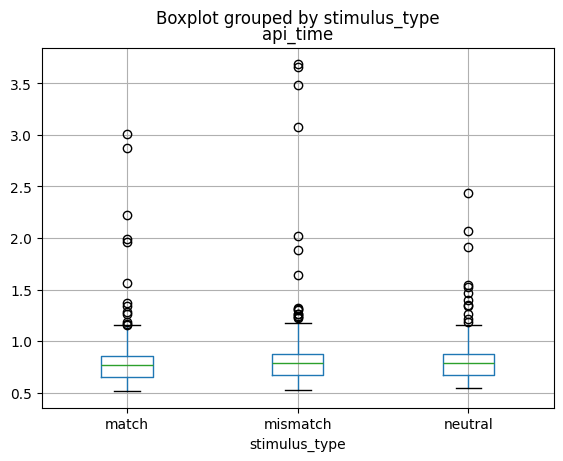

In [39]:
df[df["api_time"] < 5].boxplot(by="stimulus_type", column="api_time")

In [34]:
# anova on api_time per stimulus_type
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('api_time ~ C(stimulus_type)', data=df).fit()
anova_table = anova_lm(model)
print(anova_table)




                     df       sum_sq   mean_sq         F    PR(>F)
C(stimulus_type)    2.0     5.052882  2.526441  1.175225  0.309317
Residual          751.0  1614.462831  2.149751       NaN       NaN


In [35]:
import scipy.stats as stats

stats.f_oneway(df.groupby("stimulus_type")["api_time"].get_group("neutral"),
               df.groupby("stimulus_type")["api_time"].get_group("match"),
               df.groupby("stimulus_type")["api_time"].get_group("mismatch"))





F_onewayResult(statistic=np.float64(1.1752250952794783), pvalue=np.float64(0.3093166291304956))